Analyse des signaux médicaux - Séance 1 de TP
--
**hola**
At the end of this session, you will be able to : 
- Create and manage the Jupyter Notebooks environment to run code, insert text and math equations
- Perform basic matrix manipulations using Numpy 
- Create signals and perform basic scientific computing using Scipy and Numpy
- Produce simple data visulisation using Matplotlib 
- Open, manipulate and visualize an EEG dataset used in the course

Part 1 - Intro to Jupyter Notebook
--
Here, we will only cover the basics. 

Jupyter Notebook is based on the .ipynb format (iPython Notebook), and is essentially a way to do rapid prototyping / demonstrations of scientific python. The basic idea is to define *cells*. 
Cellss can be of several types, including python code, or rich text (using [markdown formatting](https://www.markdownguide.org/basic-syntax/)).

When a code cell is evaluated (i.e. the python code will be executed), the output of this evaluation will show up right below the cell. 

When a text cell is evaluated, the text will be formatted. 

You can now do the "User Interface Tour" from the Help menu. 

Done ? 

When working with Jupyter Notebook, you will essentially switch between two modes : 
- The Edit mode in which you edit the content of the cells 
- The Command mode, that enables you to change the cell types. 

When in Command mode, you can select cells. If you select a single cell, you can edit it by simply pressing enter, or double clicking on it. 

For example, try editing THIS CELL and change its content. 

Now, edit the cell below, change the code, and when you're done, press Shift+Enter to evalute the code. 

In [31]:
### CELL TO BE EDITED

a=32
b= 2*a
print("%d + %d"%(a,b))
print("Numeros {},{},{} {}".format(a,b,3,"test"))

32 + 64
Numeros 32,64,3 test


Text cells can contain math expressions that use the Markdown formatting, in which you can use LaTEx expressions for maths (enclosed between two dollar signs). 

For example : $A(k) \triangleq \sum_{\mathbf{n} =1}^{k}{n^2}$

Now : 
- Edit the current cell to show the code that displays the math expression,
- Create a code cell below that defines a function that calculates $A(k)$ given k, and evaluate this cell,
- Create another cell and use the function to display $A(k)$ for a few values of $\mathbf{k}$ (eg 10 and 20).

In [18]:
def A(k):
    result = 1
    for i in range(2,k+1):
        result = result + (i*i)
    return result

In [23]:
A(10)

385

In [24]:
A(20)

2870

Note that using Jupyter Notebook, if you evaluate a cell with a function followed by a "?" sign, the help of the function will pop up. 

Example : 

In [25]:
import os

os.listdir?

You can also display the code of a function using the syntax "??" 

In [ ]:
A??

The popup can be closed by pressing the Escape key. 

Use the listdir function to browse the content of some directories... 


In [ ]:
os.listdir('../')

In [ ]:
os.listdir('./')

Part 2 - Introduction to Numpy, Scipy and Matplotlib 
--

A code cell can contain any python code, including imports. Let's start by importing the Numpy package. 

In [70]:
import numpy as np

Numpy can be used to generate pseudo-random values from various distributions. In particular, a very useful distribution is the standard normal (zero mean and unit variance). Let's generate two vectors sampled from the normal distribution, using a length parameter that we'll be able to change if needed. 

In [27]:
length = 50

vecA = np.random.randn(length)
vecB = np.random.randn(2*length)

vecA and vecB are numpy *arrays*. One of their attributes can be fetched to check their *shape*

In [28]:
print(vecA.shape)
print(vecB.shape)

(50,)
(100,)


In [29]:
print(vecA)


[-0.3174643   1.1016914   0.23260332  1.40942229  0.39630322 -0.19843763
 -0.25980082 -0.91635726  0.14144275  0.33228445 -1.66609693  0.30870861
  1.03932574 -1.23344956 -1.35150338  0.484842    1.88534521  0.84743438
 -1.91071425  1.73571043 -0.2834377   1.71505274 -0.18203934 -0.64216637
  2.239132    0.73199507 -1.29855924 -0.15409217 -0.76043198  0.65837455
 -1.99819941  1.01541455  0.02991034 -0.42337432 -0.32659915 -0.79821692
  1.13387943 -0.56076722 -0.82249352  1.3791861   0.53672435 -0.28768544
 -0.25893976  0.71568777  0.14171197 -1.5771155  -0.55068843  0.4775454
  0.43237328  0.77099   ]


Numpy arrays can be vectors as well as matrices, or any tensor. For example the following code will create tensors with 3 dimensions using the standard normal

This could be used for instance for EEG signals in the time frequency domain. Let's imagine we have Power Spectral Density in 10 frequency bands, 1 second at 500 Hz, and 5 electrodes. We can generate a random signal with such shape by using numpy random generators.

Check the syntax of the np.random.randn function, and generate an array called EEG_timefreq, with the specifications  (10 frequency bands, 1 second at 500 Hz, and 5 electrodes)

In [30]:
EEG_timefreq = np.random.rand(10,500,5)
print(EEG_timefreq.shape)

(10, 500, 5)


Note that the random package of Numpy has several other interesting functions. Try to test the two functions proposed in the cell below. 

Try uncommenting the two functions below one by one, look up their help page, and try to use them. 

In [36]:
#TEST WITH VECTOR PRINT
print(EEG_timefreq[0][0].shape)
print(EEG_timefreq[0][0][:5])
print(EEG_timefreq[0].shape)

(5,)
[0.42717337 0.89227829 0.05706025 0.43972388 0.56957178]
(500, 5)


In [49]:
# Return random integers from `low` (inclusive) to `high` (exclusive).
np.random.randint?
np.random.randint(0,5) #random integer >= 0 < 5

3

In [59]:
np.random.permutation?
# Randomly permute a sequence, or return a permuted range.
np.random.permutation(10) 


array([1, 8, 0, 4, 3, 7, 2, 9, 5, 6])

In [60]:
x = [1,2,6,1]

In [64]:
np.random.permutation(x)

array([2, 6, 1, 1])

A very important features of arrays is the fact they can be used as *iterables*. For example, you can iterate over the dimensions of an array by simply "looping" over it using a *for* loop

In [65]:
for freqband in EEG_timefreq:
    print(freqband.shape)

(500, 5)
(500, 5)
(500, 5)
(500, 5)
(500, 5)
(500, 5)
(500, 5)
(500, 5)
(500, 5)
(500, 5)


This way, we can loop over frequency bands, and process each frequency band separately. 

Also possible to enumerate along the dimension in order to get the index of the current "smaller" array


In [66]:
print('Initial shape is %d %d %d' % (EEG_timefreq.shape[0],EEG_timefreq.shape[1],EEG_timefreq.shape[2]))
print('Iterating over the first dimension using an index k')
for k,curdim in enumerate(EEG_timefreq):
    print('k = %d, shape is %d %d' % (k,curdim.shape[0],curdim.shape[1]))

Initial shape is 10 500 5
Iterating over the first dimension using an index k
k = 0, shape is 500 5
k = 1, shape is 500 5
k = 2, shape is 500 5
k = 3, shape is 500 5
k = 4, shape is 500 5
k = 5, shape is 500 5
k = 6, shape is 500 5
k = 7, shape is 500 5
k = 8, shape is 500 5
k = 9, shape is 500 5


Now let's imagine we want to calculate the average power over time and electrode, for each couple frequency band. 

In [114]:
import matplotlib.pyplot as plt
for freq in EEG_timefreq:
    print((np.mean(freq,axis=0)))


[0.51465309 0.49486695 0.48376589 0.5131419  0.50964421]
[0.47231419 0.50742672 0.50141582 0.48894336 0.50308845]
[0.51682931 0.5014765  0.49916107 0.49942859 0.51294063]
[0.50147137 0.51715759 0.50449824 0.49943531 0.49958192]
[0.51973821 0.51028112 0.49139282 0.49023355 0.51654024]
[0.47804453 0.51879561 0.50305492 0.49076663 0.49796814]
[0.5022959  0.51851497 0.50184546 0.48158961 0.49688564]
[0.48435029 0.50269593 0.5072184  0.51170044 0.50643893]
[0.52086996 0.4966695  0.50254271 0.50658288 0.50054092]
[0.50439717 0.50186499 0.51078492 0.50593601 0.48144665]


np.mean(EEG_timefreq[0][:,1])
#first band, first electrode

In [119]:

hist = plt.hist(EEG_timefreq[0][:,1], bins=30, density=True)

Check that you obtain the same result when directly computing the average over the two axis 1 and 2 (look up the arguments of np.mean), which correspond to averaging in time and electrode.

In [113]:
np.mean(EEG_timefreq, axis=1)

array([[0.51465309, 0.49486695, 0.48376589, 0.5131419 , 0.50964421],
       [0.47231419, 0.50742672, 0.50141582, 0.48894336, 0.50308845],
       [0.51682931, 0.5014765 , 0.49916107, 0.49942859, 0.51294063],
       [0.50147137, 0.51715759, 0.50449824, 0.49943531, 0.49958192],
       [0.51973821, 0.51028112, 0.49139282, 0.49023355, 0.51654024],
       [0.47804453, 0.51879561, 0.50305492, 0.49076663, 0.49796814],
       [0.5022959 , 0.51851497, 0.50184546, 0.48158961, 0.49688564],
       [0.48435029, 0.50269593, 0.5072184 , 0.51170044, 0.50643893],
       [0.52086996, 0.4966695 , 0.50254271, 0.50658288, 0.50054092],
       [0.50439717, 0.50186499, 0.51078492, 0.50593601, 0.48144665]])

These features will prove to be very useful when manipulate large arrays. 

Another important operation when working with Numpy Arrays is *reshaping*. Essentially, *reshaping* consists in changing the organisation of the array (in terms of dimension), while keeping the same number of elements. For example, a 20x10 2D array can be converted into a 4x5x10 array

In [120]:
A = np.random.randint(1,5,(10,20))
print('Initial shape of A is %d x %d' % (A.shape[0],A.shape[1]))
print(A)
B = A.reshape((4,5,10))
print('B is A reshaped to %d x %d x %d' % (B.shape[0],B.shape[1],B.shape[2]))
print(B)

Initial shape of A is 10 x 20
[[4 4 4 3 1 1 3 2 1 4 3 2 4 3 4 1 4 4 2 3]
 [1 3 4 2 4 4 3 4 1 3 4 3 4 3 4 4 3 4 4 4]
 [2 3 1 1 3 1 3 2 1 3 4 4 4 4 4 2 3 1 2 2]
 [2 3 3 4 2 1 1 3 4 3 1 4 3 4 2 4 4 2 2 2]
 [1 4 2 2 1 1 1 3 1 3 4 3 4 4 2 2 2 2 4 2]
 [4 1 4 2 2 1 3 4 1 2 3 1 2 2 1 1 2 3 2 4]
 [4 1 1 2 1 2 2 1 4 4 3 1 1 4 3 3 1 3 2 3]
 [2 2 4 1 2 4 1 4 1 4 4 3 3 2 4 1 1 2 1 3]
 [2 4 1 2 2 2 1 2 3 4 1 3 1 3 4 2 3 2 3 1]
 [2 2 4 2 4 2 3 4 2 2 2 2 2 1 4 1 1 3 1 4]]
B is A reshaped to 4 x 5 x 10
[[[4 4 4 3 1 1 3 2 1 4]
  [3 2 4 3 4 1 4 4 2 3]
  [1 3 4 2 4 4 3 4 1 3]
  [4 3 4 3 4 4 3 4 4 4]
  [2 3 1 1 3 1 3 2 1 3]]

 [[4 4 4 4 4 2 3 1 2 2]
  [2 3 3 4 2 1 1 3 4 3]
  [1 4 3 4 2 4 4 2 2 2]
  [1 4 2 2 1 1 1 3 1 3]
  [4 3 4 4 2 2 2 2 4 2]]

 [[4 1 4 2 2 1 3 4 1 2]
  [3 1 2 2 1 1 2 3 2 4]
  [4 1 1 2 1 2 2 1 4 4]
  [3 1 1 4 3 3 1 3 2 3]
  [2 2 4 1 2 4 1 4 1 4]]

 [[4 3 3 2 4 1 1 2 1 3]
  [2 4 1 2 2 2 1 2 3 4]
  [1 3 1 3 4 2 3 2 3 1]
  [2 2 4 2 4 2 3 4 2 2]
  [2 2 2 1 4 1 1 3 1 4]]]


Now try implementing the same function $A(k)$ that we implemented in part 1 using numpy.

Recall that $A(k) \triangleq \sum_{\mathbf{n} =1}^{k}{n^2}$

The following numpy auxiliary functions can help you:
   - power: (np.power(base,exponent), example: np.power(2,2) = 4
   - arange: (np.arange(last element), example: np.arange(5) = [0,1,2,3,4]
   - sum: (np.sum(vector), example: np.sum([0,1,2,3]) = 6
   
   
Use these numpy functions to calculates $A(1)$ through $A(10)$ in a single for loop.

In [ ]:
### CELL TO BE COMPLETED 


One property of numpy that is really important is broadcasting. The goal of broadcasting is to simplify the vectorization of certain operations when the vectors do not have the same shape. For example you can easily perform element-wise multiplication.

To test this try doing an element-wise multiplication of the vector x and matrix y below

In [ ]:
x = np.array([2,3])
y = np.array([[4,1],[9,10],[12,13]])
result = x*y
print("X: ",x)
print("Y: ")
print(y)
print("X shape is: ",x.shape)
print("Y shape is: ",y.shape)
print("Element-wise multiplication shape:", result.shape)
print("Element-wise multiplication result:")
print(result)


Another very powerful tool in numpy is indexing. You can use either an integer vector or a boolean vector to choose which indexes you want to extract from your numpy tensor.

Consider that we want to extract all elements from the first line of your vector y that have a higher value than 1, you would have to do:

In [ ]:
first_row = y[0]
first_row_higher_than_one = first_row > 1
print("Result: ", first_row[first_row_higher_than_one])

You can also choose specific lines to query, for example if you want to query lines 0 and 2

In [ ]:
rows = [0,2]
rows_result = y[rows]
values_higher_than_one = rows_result > 1
print("Result: ", rows_result[values_higher_than_one])

You can also save and load your numpy tensors using np.savez and np.load. This will be really important as this enable you to generate your data only once instead of having to do all the calculations every time you need your data.

In [ ]:
filename = "x.npz"
source_tensor = x
np.savez(filename,data=source_tensor)

In [ ]:
loaded_npz = np.load(filename)
loaded_tensor = loaded_npz["data"]
print("Your tensor was loaded and contains: ", loaded_tensor)

Part 3 - Application to an EEG dataset
--

Let's load some EEG data acquired with OpenBCI and visualize it

In [1]:
import matplotlib.pyplot as plt

In [3]:
### The next command is not python, but is specific to jupyter.

%matplotlib inline

from mne.io import read_raw_edf # This is the function to open the raw data

import matplotlib.pyplot as plt # We also import the plotting functions from matplotlib

The following cell opens the data and fixes the data structure - just run it. 

### * change montage and stim


In [166]:
filepath = 'data/file1.edf'

# Raw = read_raw_edf(filepath,stim_channel=False)  
##------ old version ! just with filepath it takes 5 eeg
Raw = read_raw_edf(filepath)
from mne.channels import rename_channels
#Changing the channel names because there is a mistake
rename_channels(Raw.info,{'T7' : 'FT7','T8' : 'FT8'}) #FC8 ?

from mne.channels import read_montage
# We read the electrode position from the standard template positions
#----- old version ! montage = read_montage(kind='standard_1020',ch_names=Raw.ch_names)
montage = mne.channels.make_standard_montage('standard_1020')
# and apply them to the data
Raw.set_montage(montage)

scales = dict(eeg='auto') ### This is necessary because the data acquired by openBCI 
# seems to have a very different scaling than the data acquired by standard EEG amplifiers

Raw.load_data()

Extracting EDF parameters from /home/camila/Documents/TAF HEALTH/python/patientnum/TP/data/file1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
DigMontage is a superset of info. 89 in DigMontage will be ignored. The ignored channels are: {'C3', 'PO10', 'O2', 'FC1', 'AF10', 'AF7', 'C6', 'F6', 'O10', 'FT10', 'CP2', 'T8', 'P3', 'CP1', 'FC3', 'PO5', 'P7', 'FC4', 'A2', 'F8', 'P6', 'C4', 'P8', 'M2', 'TP9', 'P9', 'AF1', 'CP5', 'AF5', 'T6', 'PO8', 'F9', 'PO9', 'P1', 'T7', 'Iz', 'PO6', 'FC6', 'PO2', 'F3', 'Oz', 'T9', 'FC2', 'P2', 'AF6', 'F10', 'C1', 'PO7', 'T4', 'A1', 'Pz', 'T5', 'T10', 'AFz', 'AF3', 'AF4', 'AF9', 'T3', 'FC5', 'CPz', 'AF2', 'TP7', 'PO4', 'F5', 'CP3', 'Cz', 'Fz', 'P10', 'FT9', 'CP6', 'F2', 'C2', 'TP10', 'F1', 'P5', 'PO1', 'CP4', 'F7', 'O1', 'M1', 'FCz', 'PO3', 'O9', 'TP8', 'C5', 'F4', 'P4', 'POz', 'AF8'}
Reading 0 ... 145999  =      0.000 ...   583.996 secs...


<ipython-input-166-ff68291f0293>:5: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  Raw = read_raw_edf(filepath)


<RawEDF  |  file1.edf, n_channels x n_times : 5 x 146000 (584.0 sec), ~5.6 MB, data loaded>

<Figure size 720x432 with 0 Axes>

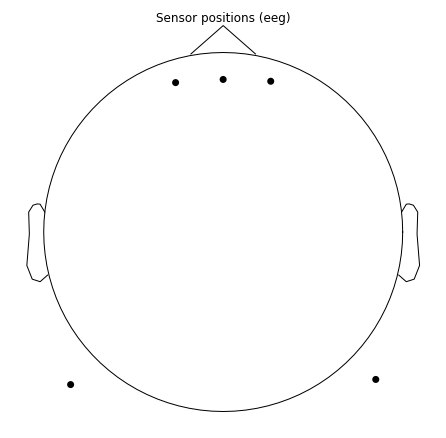

In [167]:
plt.figure(figsize = (10,6))
x  = Raw.plot_sensors()

Information about the data can be obtained by examining the "info" structure from the Raw object. 

Let's print it . 

In [168]:
print(Raw.info)

<Info | 17 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, FT7, Fp2, FT8, Fpz
    chs : list | 5 items (EEG: 5)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    dig : Digitization | 8 items (3 Cardinal, 5 EEG)
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : tuple | 2020-03-16 14:07:07 GMT
    nchan : int | 5
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name

Most importantly, we can see the channel names and the sampling frequency.

The data can be fetched into a numpy array, using the "get_data()" method. 

In [155]:
eeg_array = Raw.get_data()

What is the shape of this array ? What do the respective dimensions correspond to ? 
What is the duration of the recording (in seconds) ? 

In [156]:
eeg_array.shape
print("duration = {}s".format(eeg_array.shape[1]/250))

duration = 584.0s


The Raw.times vector gives the time points of measurements, in seconds. 

Thus, it can be used to plot the data. 

In the cell below: 
- create an time_indices vector, containing the indices of the first five seconds of the Raw.times vector
- generate a x vector as Raw.times[time_indices] 
- create a y vector as eeg_array[electrode,time_indices] (choose an electrode)
- use plt.plot(x,y) to plot the first five seconds of data of the chosen electrode

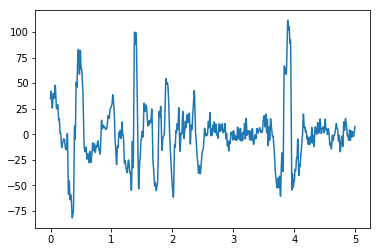

In [117]:
time_indices = Raw.times < 5
x = Raw.times[time_indices]
y = eeg_array[2,time_indices]

#plot the electrode
fig, ax = plt.subplots()
ax.plot(x,y)

Now do the same by creating a time_indices vector between two times. You can use a boolean operation between two conditional vectors. 

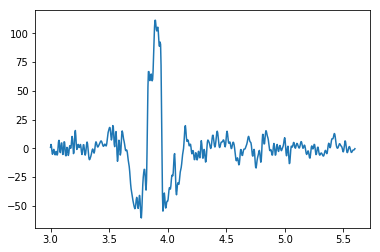

In [11]:
#boolean
t1 = 3
t2 = 5.6

time_indices = (Raw.times >= t1) & (Raw.times <= t2)
x = Raw.times[time_indices]
y = eeg_array[2,time_indices]

#plot the electrode
fig, ax = plt.subplots()
ax.plot(x,y)

Use the previous cell to identify: 
- a few "artefact free" segments
- Segments corresponding to artefact

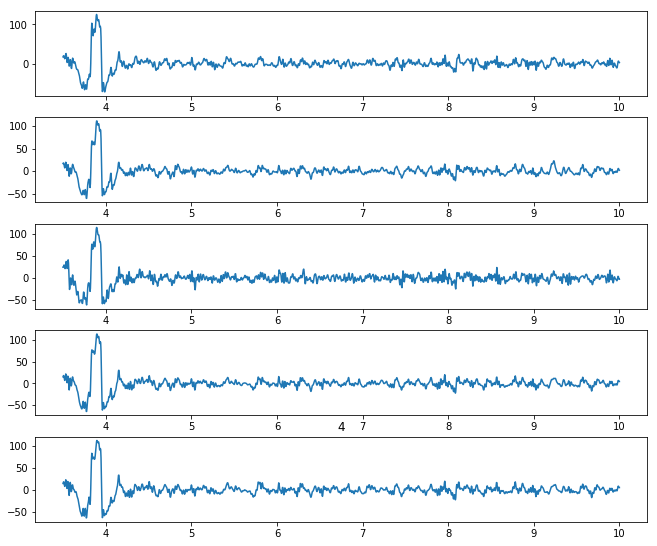

In [199]:
t1 = 3.5
t2 = 10

time_indices = (Raw.times >= t1) & (Raw.times <= t2)

fig, ax = plt.subplots(5,1, figsize = (10,5))
for i  in range(5):
    x = Raw.times[time_indices]
    y = eeg_array[i,time_indices]
    ax[i-1].plot(x,y)
    plt.title("{}".format(i))

plt.subplots_adjust(top=1.5, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


The first minute of this recording corresponds to a resting baseline, during which the subject closed his eyes and tried to relax. The remaining of the recording was done during improvised musical performance. Can you identify more artefacts in the active period than in the rest period ? 

Text(0.5, 1.0, 'Rest period')

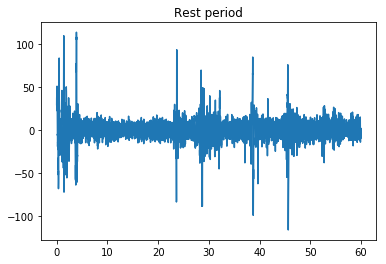

In [158]:
t1 = 0
t2 = 60

time_indices = (Raw.times >= t1) & (Raw.times <= t2)
x = Raw.times[time_indices]
y = eeg_array[i,time_indices]
plt.plot(x,y)
plt.title("Rest period")



Text(0.5, 1.0, 'Active period')

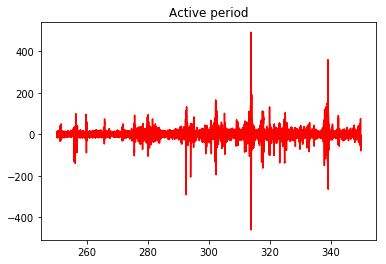

In [159]:
t1 = 250
t2 = 350

time_indices = (Raw.times >= t1) & (Raw.times <= t2)
x = Raw.times[time_indices]
y = eeg_array[i,time_indices]
plt.plot(x,y,c = 'r')
plt.title("Active period")

Estimating the Power Spectral Density of Raw Data
--

We are using [MNE](https://mne.tools/stable/auto_tutorials/index.html) to load and process the EEG data. 

The data is managed using an object, Raw, which includes methods for visualization, filtering, and much more. 

We can directly plot the Power Spectral density (PSD) using the plot_psd method of the Raw object. Look up its syntax, and compare the PSD for artefact free periods with the ones with artefacts.

N.B. **the data was acquired using a highpass filter at 0.1 Hz, and a lowpass at 40 Hz. Therefore, it is useless to examine PSD after 40 Hz.**

`
highpass : float | 0.0 Hz
hpi_meas : list | 0 items
hpi_results : list | 0 items
lowpass : float | 125.0 Hz
`

In [39]:

Raw.plot_psd?

# rest period & active !

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)


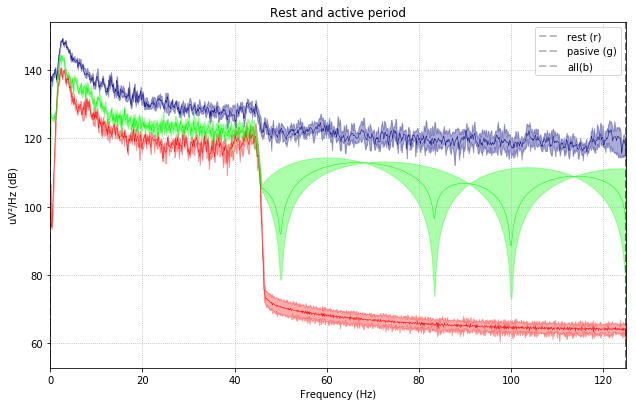

In [160]:
plt.figure(figsize = (10,6))
ax = plt.axes()
Raw.plot_psd(area_mode='range', tmin = 0, tmax=60, show=False, average=True,color=(1, 0, 0),ax = ax)
Raw.plot_psd(area_mode='range', tmin = 250, tmax=350, show=False, average=True,color=(0, 1, 0),ax= ax)
Raw.plot_psd(area_mode='range', tmax = np.inf, show=False, average=True,color=(0, 0, 0.5),ax= ax)

ax.set_title('Rest and active period')
plt.legend(ax.lines[::3], ['rest (r)', 'pasive (g)','all(b)'])


# 40Hz

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)


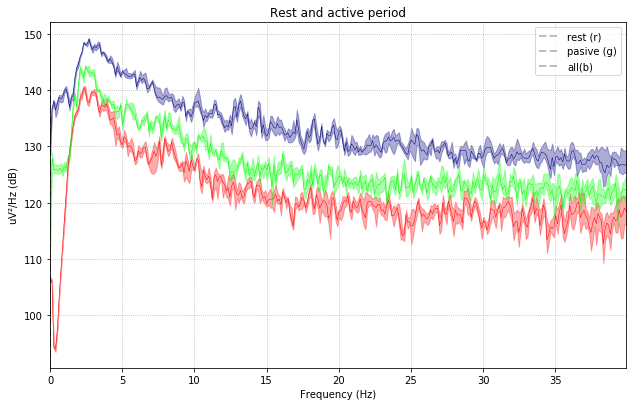

In [161]:
plt.figure(figsize = (10,6))
ax = plt.axes()
Raw.plot_psd(area_mode='range', tmin = 0, tmax=60, show=False, average=True,color=(1, 0, 0),ax = ax, fmax = 40)
Raw.plot_psd(area_mode='range', tmin = 250, tmax=350, show=False, average=True,color=(0, 1, 0),ax= ax, fmax = 40)
Raw.plot_psd(area_mode='range', tmax = np.inf, show=False, average=True,color=(0, 0, 0.5),ax= ax, fmax = 40)

ax.set_title('Rest and active period')
plt.legend(ax.lines[::3], ['rest (r)', 'pasive (g)','all(b)'])


Finding EOG artifacts
--

MNE comes with very nice methods to automatically find artefacts. This is explained in depth [here](https://mne.tools/stable/auto_tutorials/preprocessing/plot_10_preprocessing_overview.html#sphx-glr-auto-tutorials-preprocessing-plot-10-preprocessing-overview-py). Quickly go through this tutorial, and apply the create_eog_epochs to find all EOG artefacts in the provided data. You can use one of the Fpx channels as an EOG electrode

In [172]:
from mne.preprocessing import create_eog_epochs

### 1. Visualizing the artifacts

Using channel Fpz as EOG channel
EOG channel index for this subject is: [4]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 4096 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 134 significant peaks
Number of EOG events detected : 134
134 matching events found
No baseline correction applied
Not setting metadata
Loading data for 134 events and 251 original time points ...
0 bad epochs dropped
134 matching events found
No baseline correction applied
Not setting metadat

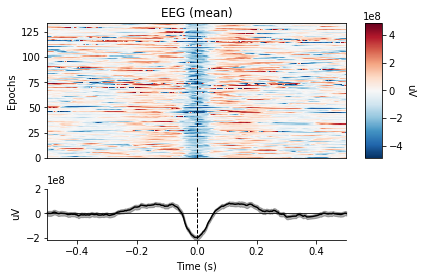

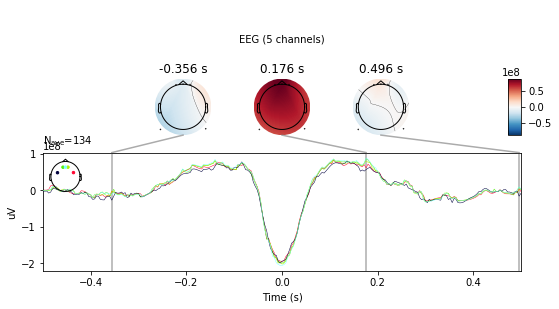

In [225]:
eog_epochs = create_eog_epochs(Raw,ch_name ='Fpz')

# field pattern across sensors by averaging 
x = eog_epochs.plot_image(combine='mean')
x = eog_epochs.average().plot_joint()

Using channel FT8 to identify heart beats.
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 4096 samples (16.384 sec)

Number of ECG events detected : 529 (average pulse 54 / min.)
529 matching events found
No baseline correction applied
Not setting metadata
Loading data for 529 events and 251 original time points ...
1 bad epochs dropped
528 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
combining channels using "mean"


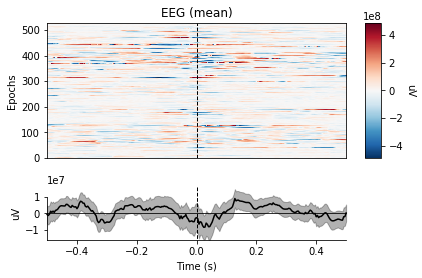

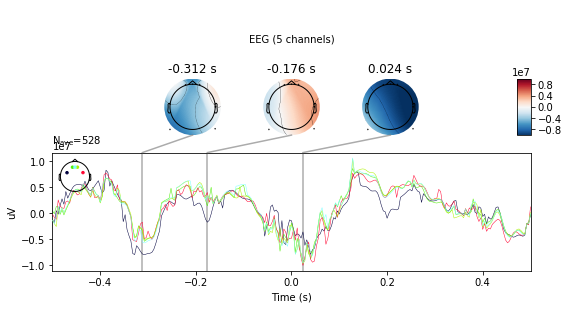

In [228]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(Raw,ch_name ='FT8')

# field pattern across sensors by averaging 
x = ecg_epochs.plot_image(combine='mean')
x = ecg_epochs.average().plot_joint()

### 2. Filtering to remove slow drifts

An important step is filtering the data to remove low-frequency drifts, which can negatively affect the quality of the ICA fit. The slow drifts are problematic because they reduce the independence of the assumed-to-be-independent sources ( (e.g., during a slow upward drift, the neural, heartbeat, blink, and other muscular sources will all tend to have higher values), making it harder for the algorithm to find an accurate solution. 

In [229]:
filt_raw = Raw.copy()
filt_raw.load_data().filter(l_freq=1., h_freq=None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 sec)



<RawEDF  |  file1.edf, n_channels x n_times : 5 x 146000 (584.0 sec), ~5.6 MB, data loaded>

Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)


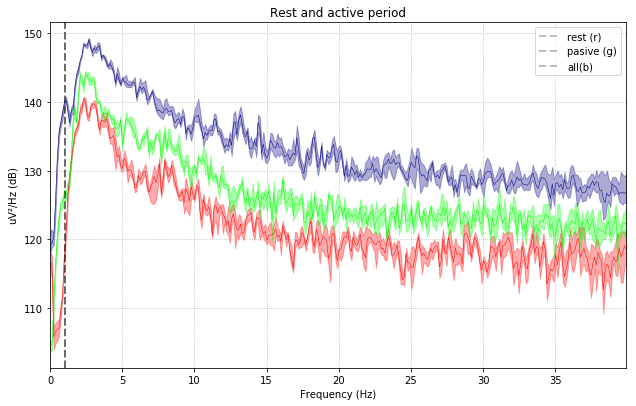

In [231]:
plt.figure(figsize = (10,6))
ax = plt.axes()
filt_raw.plot_psd(area_mode='range', tmin = 0, tmax=60, show=False, average=True,color=(1, 0, 0),ax = ax,fmax = 40)
filt_raw.plot_psd(area_mode='range', tmin = 250, tmax=350, show=False, average=True,color=(0, 1, 0),ax= ax,fmax = 40)
filt_raw.plot_psd(area_mode='range', tmax = np.inf, show=False, average=True,color=(0, 0, 0.5),ax= ax,fmax = 40)

ax.set_title('Rest and active period')
plt.legend(ax.lines[::3], ['rest (r)', 'pasive (g)','all(b)'])


### 3 . Fitting and plotting the ICA solution

*This technique can be combined with ICA, to automatically identify an ICA component that correspond to eye blinks. This is explained in detail [here](https://mne.tools/stable/auto_tutorials/preprocessing/plot_40_artifact_correction_ica.html#using-an-eog-channel-to-select-ica-components).* 

*Can you perform ICA on this dataset, and remove the EOG artefacts?*



In [234]:
from mne.preprocessing import (ICA,corrmap)
ica = ICA(random_state=97)
ica.fit(filt_raw)

Fitting ICA to data using 5 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 5
Fitting ICA took 0.9s.


<ICA  |  raw data decomposition, fit (fastica): 146000 samples, 5 components, channels used: "eeg">

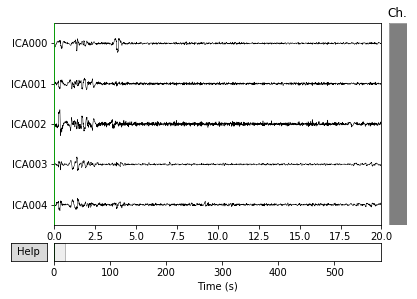

In [241]:
Raw.load_data()
x = ica.plot_sources(Raw)
x.set_size_inches(10,6)

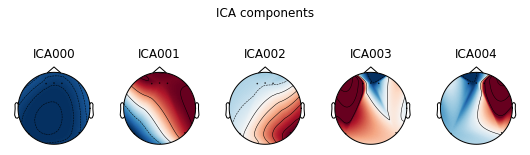

[<Figure size 540x180 with 5 Axes>]

In [242]:
ica.plot_components()

    Using multitaper spectrum estimation with 7 DPSS windows
291 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
291 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
291 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
291 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
291 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


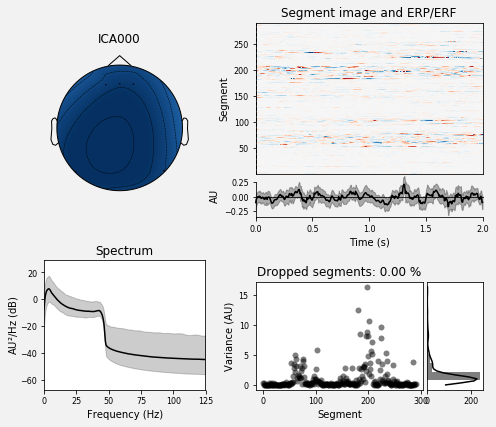

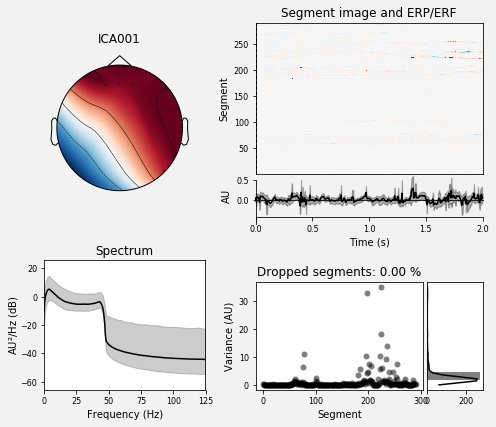

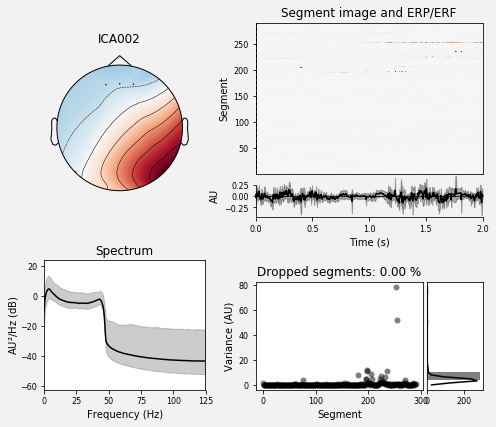

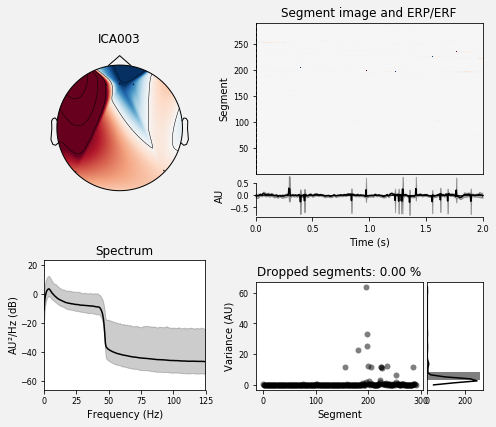

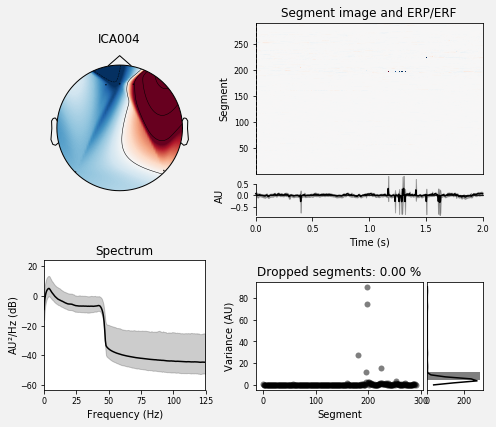

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [246]:
ica.plot_properties(Raw, picks=[0, 1])

In [255]:
event_id = 998
eog_events = mne.preprocessing.find_eog_events(Raw, event_id, ch_name='Fpz')

# Read epochs
#picks = mne.pick_types(Raw.info, meg=False, eeg=False, stim=False, eog=True,
                      
    
tmin, tmax = -0.2, 0.2
epochs = mne.Epochs(Raw, eog_events, event_id, tmin, tmax)
data = epochs.get_data()

print("Number of detected EOG artifacts : %d" % len(data))

Using channel Fpz as EOG channel
EOG channel index for this subject is: [4]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 4096 samples (16.384 sec)

Now detecting blinks and generating corresponding events
Found 134 significant peaks
Number of EOG events detected : 134
134 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 134 events and 101 original time points ...
0 bad epochs dropped
Number of detected EOG artifacts : 1